Reference:  
https://github.com/IFL-CAMP/SLClassificationAnEducationalCode-MEC2019
https://medium.com/miccai-educational-initiative/skin-cancer-image-classification-an-educational-guide-2a043a1beb59

**Checking my directory**

In [1]:
#checking my current directory

In [4]:
import os
os.getcwd()

'C:\\Users\\namrata\\AI practice\\AI Projects'

In [14]:
#change directory if necessary
os.chdir("C:/Users/namrata/Desktop/project_healthcnn/dataverse_files/HAM10000")

In [111]:
os.getcwd()

'C:\\Users\\namrata\\Desktop\\project_healthcnn\\dataverse_files\\HAM10000'

**Setting path to the dataset**

In [16]:
data_path = os.getcwd() 

In [17]:
data_path

'C:\\Users\\namrata\\Desktop\\project_healthcnn\\dataverse_files\\HAM10000'

**Datasets has**   
    1. csv file     
    2. images  
**let me explore that**

**Exploring 1. csv file**

In [18]:
import pandas as pd
metadata = pd.read_csv(data_path + '\HAM10000_metadata.csv')

In [29]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [32]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [37]:
import matplotlib.pyplot as plt

In [104]:
fig = plt.figure(figsize=(20,10))
fig2 = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [105]:
ax1= fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4= fig.add_subplot(224)

ax12= fig2.add_subplot(221)

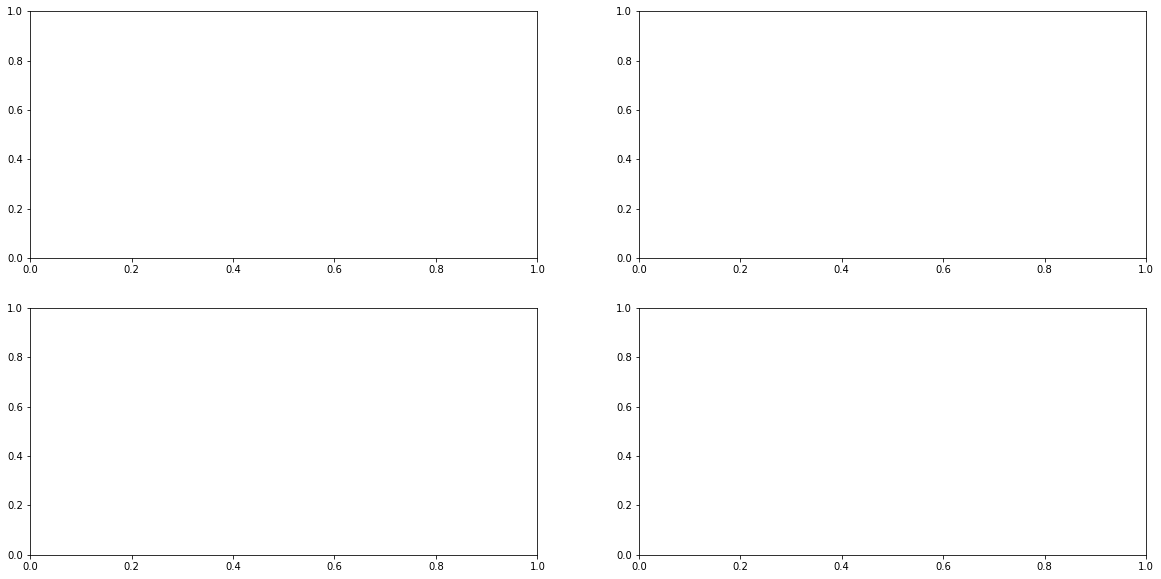

In [106]:
fig

In [107]:
metadata['dx'].value_counts()
metadata['sex'].value_counts()
metadata['localization'].value_counts()
metadata['age'].value_counts()
metadata['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [108]:
metadata['dx'].value_counts().plot(kind ='bar', ax=ax1)
metadata['sex'].value_counts().plot(kind ='bar', ax=ax2)
metadata['localization'].value_counts().plot(kind ='bar', ax=ax3)
metadata['age'].value_counts().plot(kind ='bar', ax=ax4)
metadata['dx_type'].value_counts().plot(kind ='bar', ax=ax12)


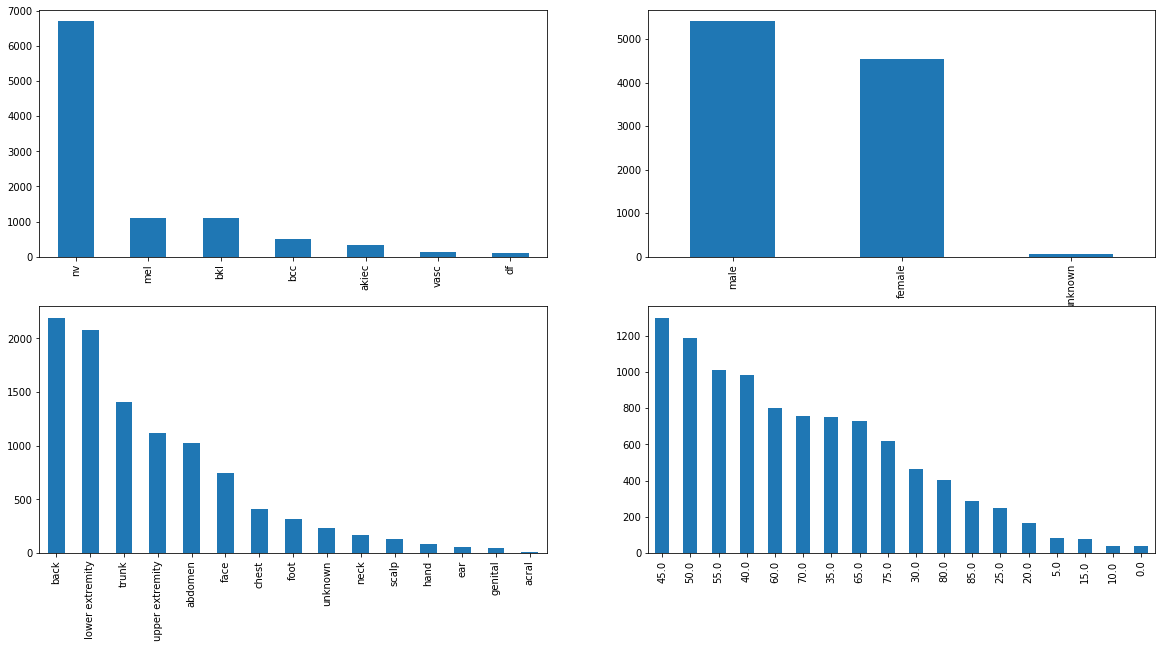

In [109]:
fig

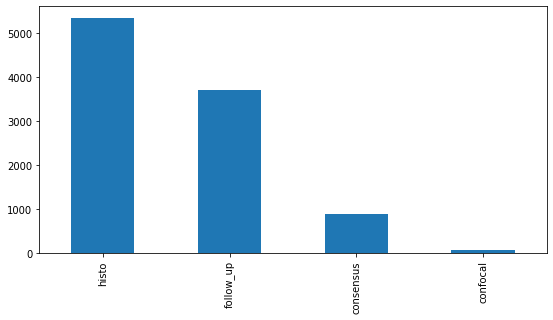

In [110]:
fig2

In [145]:
#setting labels anf titles for each graphs
ax1.set_ylabel('Count', size=25)
ax1.set_title('Cell Type', size = 25)

ax1.set_ylabel('Sex', size=25)
ax1.set_title('Cell Type', size = 25)

ax3.set_ylabel('Count', size=25)
ax3.set_title('Localization', size=25)

ax4.set_title('Age', size = 25)
ax4.set_xlabel('Year', size=25)

ax12.set_title('dx_type', size = 25)
ax12.set_xlabel('dx_type', size=25)

Text(0.5, 3.1999999999999886, 'dx_type')

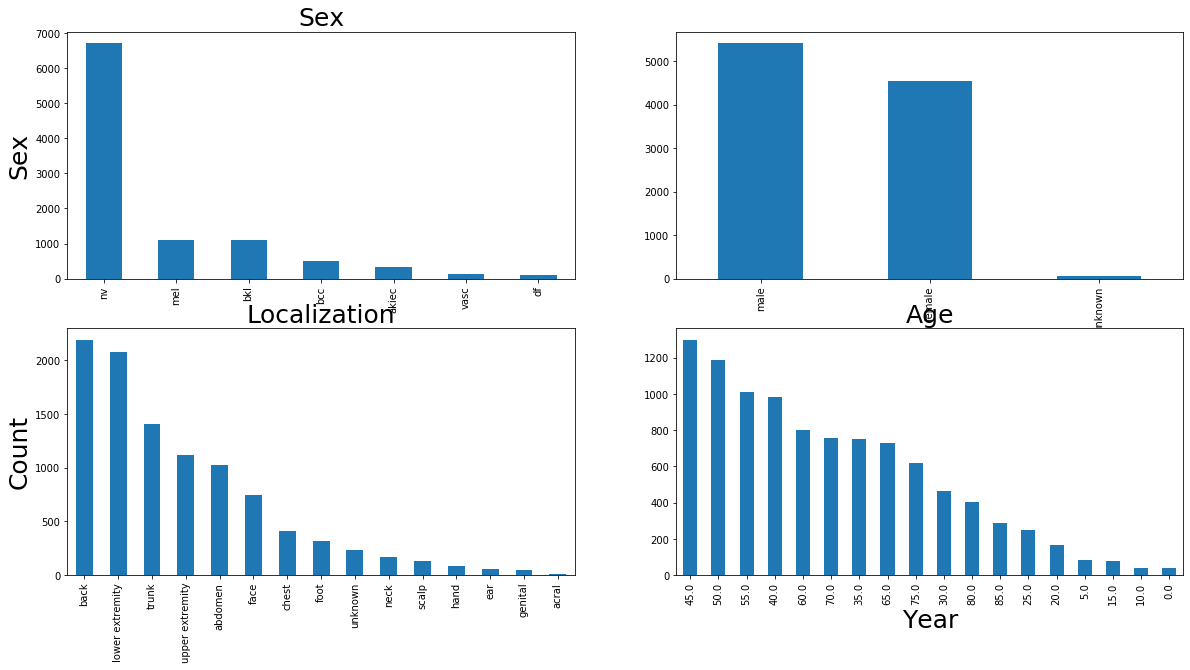

In [144]:
fig

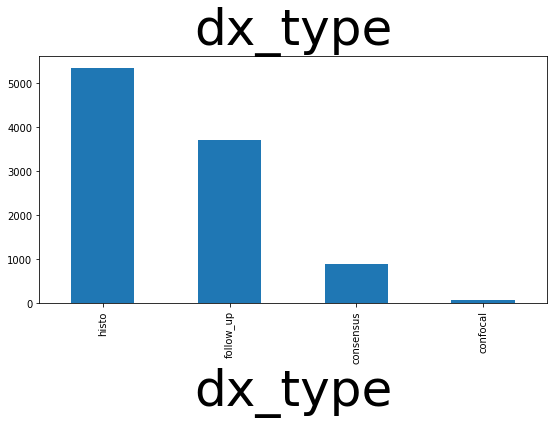

In [98]:
fig2

**Restructing the data folder structure**

In [130]:
import os
import shutil

#change the directory
os.chdir("C:/Users/namrata/Desktop/project_healthcnn/dataverse_files")

In [131]:
# A path to the folder which has all the images:
data_dir = os.getcwd() + "/HAM10000/"

# A path to the folder where you want to store the rearranged images:
dest_dir = os.getcwd() + "/HAM10K"

In [132]:
# Read the metadata file:
metadata = pd.read_csv(data_dir + '/HAM10000_metadata.csv')
labels = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [135]:
# Copy the images into new folder structure:
for label in labels:
    os.mkdir(dest_dir + "/"+ str(label) + "/")

In [136]:
#for label in labels:
for label in labels:
    sample = metadata[metadata['dx']== label]['image_id']
    for imageid in sample:
        shutil.copyfile((data_dir + "/"+ imageid +".jpg"), (dest_dir + "/"+ label + "/"+ imageid+".jpg")) 


**Now working with new data folder stucture**  
Median frequency balancing

In [147]:

import numpy as np

label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']

def estimate_weights_mfb(label):
    class_weights = np.zeros_like(label, dtype=np.float)
    counts = np.zeros_like(label)
    for i,l in enumerate(label):
        counts[i] = metadata[metadata['dx']==str(l)]['dx'].value_counts()[0]
    counts = counts.astype(np.float)
    median_freq = np.median(counts)
    for i, label in enumerate(label):
        class_weights[i] = median_freq / counts[i]
    return class_weights

classweight= estimate_weights_mfb(label)
for i in range(len(label)):
    print(label[i],":", classweight[i])

akiec : 1.5718654434250765
bcc : 1.0
bkl : 0.467697907188353
df : 4.469565217391304
mel : 0.4618149146451033
nv : 0.07665920954511558
vasc : 3.619718309859155


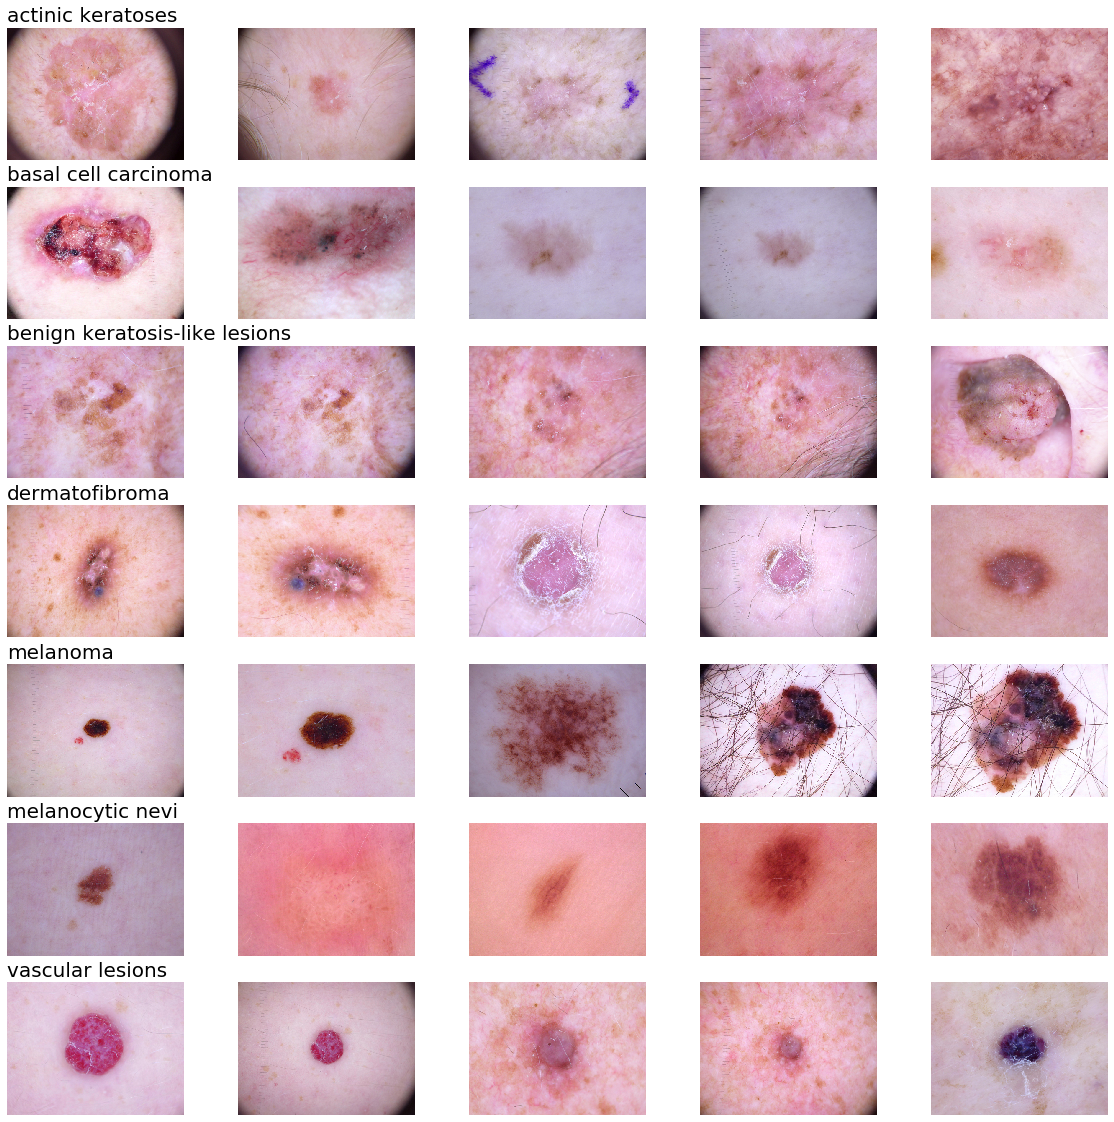

In [150]:
#Visualizing the images
import imageio
label = [ 'akiec', 'bcc','bkl','df','mel', 'nv',  'vasc']
label_images = []
classes = [ 'actinic keratoses', 'basal cell carcinoma', 'benign keratosis-like lesions', 
           'dermatofibroma','melanoma', 'melanocytic nevi', 'vascular lesions']

fig = plt.figure(figsize=(20, 20))
k = range(7)

for i in label:
    sample = metadata[metadata['dx'] == i]['image_id'][:5]
    label_images.extend(sample)
    
for position,ID in enumerate(label_images):
    labl = metadata[metadata['image_id'] == ID]['dx']
    im_sample = dest_dir + "/" + labl.values[0] + f'/{ID}.jpg'
    im_sample = imageio.imread(im_sample)

    plt.subplot(7,5,position+1)
    plt.imshow(im_sample)
    plt.axis('off')

    if position%5 == 0:
        title = int(position/5)
        plt.title(classes[title], loc='left', size=20)


In [153]:
#Data augmentaion
import torch
import torchvision.transforms as transforms
data_dir = os.getcwd() + "/HAM10000"

# normalization values for pretrained resnet on Imagenet
norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)

batch_size = 10
validation_batch_size = 10

# We compute the weights of individual classes and convert them to tensors
class_weights = estimate_weights_mfb(label)
class_weights = torch.FloatTensor(class_weights)

transform_train = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomRotation(degrees=60),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std),
                    ])

transform_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                    ])


In [161]:
import torchvision
#splitting data sets into test, train and validation
test_size = 0.2
val_size = 0.2
class Sampler(object):
    """Base class for all Samplers.
    """

    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
        
class StratifiedSampler(Sampler):
    """Stratified Sampling
    Provides equal representation of target classes
    """
    def __init__(self, class_vector,test_size):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        batch_size : integer
            batch_size
        """
        self.n_splits = 1
        self.class_vector = class_vector
        self.test_size = test_size

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit
        except:
            print('Need scikit-learn for this functionality')
        import numpy as np
        
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=self.test_size)
        X = np.random.randn(self.class_vector.size(0),2)
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index= next(s.split(X, y))
        return train_index, test_index

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)
    

dataset = torchvision.datasets.ImageFolder(root= dest_dir)
data_label = [s[1] for s in dataset.samples]

ss = StratifiedSampler(torch.FloatTensor(data_label), test_size)
pre_train_indices, test_indices = ss.gen_sample_array()
# The "pre" is necessary to use array to identify train/ val indices with indices generated by second sampler

train_label = np.delete(data_label, test_indices, None)
ss = StratifiedSampler(torch.FloatTensor(train_label), test_size)
train_indices, val_indices = ss.gen_sample_array()
indices = {'train': pre_train_indices[train_indices],  # Indices of second sampler are used on pre_train_indices
           'val': pre_train_indices[val_indices],  # Indices of second sampler are used on pre_train_indices
           'test': test_indices}
train_indices = indices['train']
val_indices = indices['val']
test_indices = indices['test']
print("Train Data Size:", len(train_indices))
print("Test Data Size:", len(test_indices))
print("Validation Data Size:", len(val_indices))

Train Data Size: 6409
Test Data Size: 2003
Validation Data Size: 1603


In [167]:
test_batch_size = 10
SubsetRandomSampler = torch.utils.data.sampler.SubsetRandomSampler

dataset = torchvision.datasets.ImageFolder(root= dest_dir, transform=transform_train)

train_samples = SubsetRandomSampler(train_indices)
val_samples = SubsetRandomSampler(val_indices)
test_samples = SubsetRandomSampler(test_indices)

train_data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False,num_workers=1, sampler= train_samples)
validation_data_loader = torch.utils.data.DataLoader(dataset, batch_size=validation_batch_size, shuffle=False, sampler=val_samples)

dataset = torchvision.datasets.ImageFolder(root= dest_dir, transform=transform_test)
test_data_loader = torch.utils.data.DataLoader(dataset, batch_size=test_batch_size, shuffle=False, sampler=test_samples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


melanocytic nevi,  melanocytic nevi,  melanoma,  melanocytic nevi,  melanocytic nevi,  melanocytic nevi,  vascular lesions,  actinic keratoses,  benign keratosis-like lesions,  melanocytic nevi, 


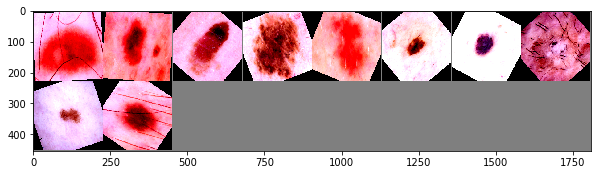

In [166]:
# functions to show an image
fig = plt.figure(figsize=(10, 15))
def imshow(img):
    img = img / 2 + 0.5     # denormalize change this
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s, ' % classes[labels[j]] for j in range(len(labels))))